# CS535/EE514 Machine Learning - Spring 2022 - PA2

## Instructions 

*   Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be 'RollNo_PA2'. Failing to submit any one of them will result in the reduction of marks.
*  All the cells must be run once before submission and should be displaying the results(graphs/plots etc). If output of the cells is not being displayed, marks will be dedcuted.
*   The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.
* 10% penalty per day for 3 days after due date. No submissions will be accepted
after that.  
* Use procedural programming style and comment your code properly.
* **Deadline to submit this assignment is 21/02/2022.**

## Part 1: Implement K-NN classifier from scratch 
The goal of this assignment is to get you familiar with k-NN classification and to give hands on experience of basic python tools and libraries which will be used in implementing the algorithm.
You are not allowed to use scikit-learn or any other machine learning toolkit for this part.
You have to implement your own k-NN classifier from scratch. You may use Pandas, NumPy, Matplotlib and other standard python libraries. 

In [1]:
# making all necessary imports here. You can make your own imports here if needed.
import glob
import cv2
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
#
from statistics import mode

In [2]:
# Downloading Dataset
!gdown --id 1ZPLfYxdXs856KsjcBgG2QGjjr6ayPwVj
!unzip "Apparel_Dataset.zip"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ZPLfYxdXs856KsjcBgG2QGjjr6ayPwVj 

Archive:  Apparel_Dataset.zip
   creating: Apparel_Dataset/
   creating: Apparel_Dataset/Test Data/
   creating: Apparel_Dataset/Test Data/dress/
  inflating: Apparel_Dataset/Test Data/dress/038098f911bf30451c109d19870668c39dcf0c11.jpg  
  inflating: Apparel_Dataset/Test Data/dress/06130b80c92914dcccb56634594b4aeab7db5944.jpg  
  inflating: Apparel_Dataset/Test Data/dress/06677e9166ce249cbe6f7cbf6ea4fae6386a1c3e.jpg  
  inflating: Apparel_Dataset/Test Data/dress/1157ce46a9d5b369f2be2cf80350dad7a2bfa144.jpg  
  inflating: Apparel_Dataset/Test Data/dress/12197cde1e9ad94ca7fdaa1bca5d8dd60868155b.jpg  
  inflating: Apparel_Dataset/Test Data/dress/1274e149dccaa0631c4cb133bf66aa0b3ae96

You have been given Apparel Dataset which contains images of dress, pants, shirts and shoes. There are two top-level directories "Test Data" and "Train Data" corresponding to test set and training set respectively.  Each of these directories further contains four directories "dress", "pants", "shirts" and "shoes". The class labels of each of the
images correspond to the directory they are contained in i.e., dress/pants/shirts/shoes. Paths of training and test data have been given to you. 

In [3]:
test_data_path = "/content/Apparel_Dataset/Test Data"
train_data_path = "/content/Apparel_Dataset/Train Data"

### TASK 1:  
Now you need to read the images and resize all of them to a fixed size (32,32). After resizing the images, flatten them to create a 1-D array and then normalize the pixel values between 0-1. This 1-D array will serve as your feature vector for the particular image.

Note: You can normalize the pixel values by dividing them by 255.






In [4]:
### YOUR CODE HERE ###
def read_images(folder):
    images = []
    for filename in os.listdir(folder):
      img = cv2.imread(os.path.join(folder, filename))
      img = cv2.resize(img,(32,32)).flatten()
      img = img/255
      images.append(img)
    return images

In [5]:
### YOUR CODE HERE ###
# Reading Train images
folders = [os.path.join(train_data_path, x) for x in ('dress', 'pants', 'shirts','shoes')]
train_images= []
train_labels = []
for folder in folders:
  imgs = read_images(folder)
  for i in range(len(imgs)):
    train_images.append(imgs[i])
    train_labels.append(folder.split('/')[-1])


In [6]:
### YOUR CODE HERE ###
# Reading Test images
folders = [os.path.join(test_data_path, x) for x in ('dress', 'pants', 'shirts','shoes')]
test_images= []
test_labels = []
for folder in folders:
  imgs = read_images(folder)
  for i in range(len(imgs)):
    test_images.append(imgs[i])
    test_labels.append(folder.split('/')[-1])

### TASK 2: 
Create your own k-Nearest Neighbors classifier function by performing following
tasks: 

*   For a test data point, find its distance from all training instances.
*   Sort the calculated distances in ascending order based on distance values.
*   Choose k training samples with minimum distances from the test data point.
*   Return the most frequent class of these samples. (Incase of ties, break them by backing off to k-1 values. For example, for a particular image, incase of k=4, you get two 'dress' labels and two 'pants' labels. In this case you will break tie by backing off to k=3. If tie occurs again you will keep backing off until tie is broken or you reach k=1.)
*   Note: Your function should work with Euclidean distance as well as Manhattan
distance. Pass the distance metric as a parameter in k-NN classifier function.
Your function should also be general enough to work with any value of k.

In [7]:
def kNN_classfifier(test,train,labels,k,predict,dist_metric):
  for ii,x in enumerate(test):
    if dist_metric == 'Euclidean':
      distances = [np.linalg.norm(x-i) for i in train] #L2 NORM
    elif dist_metric == 'Manhattan':
      distances = [np.linalg.norm(x-i,ord=1) for i in train] # L1 NORM
    k_samples_indices = np.argsort(distances)[:k] # sort and return indices
    k_labels = [labels[i] for i in k_samples_indices] # find labels of k nearest neighbors
    try: most_common = mode(k_labels) # Most common by count
    except: # Incase of tie
      ii=1
      temp=k-1
      while ii==1:
        distances = [np.linalg.norm(x-i) for i in train]
        k_samples_indices = np.argsort(distances)[:temp] # sort and return indices
        k_labels = [labels[i] for i in k_samples_indices] 
        if temp!=1:
          try: 
            ii=0
            most_common = mode(k_labels)
          except:
            ii=1
            temp=temp-1 
        else: 
          most_common = k_labels[0]
          ii=0
    predict.append(most_common)
  return np.array(predict)

### TASK 3: 
Write down functions which calculates the classification accuracy, macro-average precision and macro-average recall. Print the values of accuracy, precision and recall calculated on the test data for k = 3,5,7 for both Euclidean and Manhattan distance. You should expect the values of accuracy, precision and recall to be above 80.

In [8]:
### YOUR CODE HERE ###
dress = [x for x in test_labels if x=='dress']
pants = [x for x in test_labels if x=='pants']
shirts = [x for x in test_labels if x=='shirts']
shoes = [x for x in test_labels if x=='shoes']

In [9]:
#Accuracy
def accuracy(predictions,test_labels):
  return np.sum(predictions == test_labels)/len(test_labels)

# Macro Avg recall
def macro_recall(predictions,test_labels):
  recall_dress = np.sum(predictions[0:len(dress)] == dress)/len(dress)
  recall_pants = np.sum(predictions[len(dress):len(dress)+len(pants)] == pants)/len(pants)
  recall_shirts = np.sum(predictions[len(dress)+len(pants):len(dress)+len(pants)+len(shirts)] == shirts)/len(shirts)
  recall_shoes = np.sum(predictions[len(dress)+len(pants)+len(shirts):len(predictions)] == shoes)/len(shoes)
  return (recall_dress+recall_pants+recall_shirts+recall_shoes)/4
  
# Macro Avg precision
def macro_precision(predictions,test_labels):
  pred_copy = predictions
  prec_dress = np.sum(predictions[0:len(dress)] == dress)/(list(pred_copy).count('dress'))
  prec_pants = np.sum(predictions[len(dress):len(dress)+len(pants)] == pants)/(list(pred_copy).count('pants'))
  prec_shirts = np.sum(predictions[len(dress)+len(pants):len(dress)+len(pants)+len(shirts)] == shirts)/(list(pred_copy).count('shirts'))
  prec_shoes = np.sum(predictions[len(dress)+len(pants)+len(shirts):len(predictions)] == shoes)/(list(pred_copy).count('shoes'))
  return (prec_dress+prec_pants+prec_shirts+prec_shoes)/4



In [10]:
k = [3,5,7]
distance_metric = ['Manhattan','Euclidean']
for i in k:
  #Manhattan
  predict = []
  predictions = kNN_classfifier(test_images,train_images,train_labels,i,predict,distance_metric[0])
  print('\033[92m' +'\033[1m'+ '\033[4m'+ ' For Manhattan and k = ' + str(i) + '\033[0m')
  print('accuracy: ' ,accuracy(predictions,test_labels))
  print('Macro_avg_recall: ' , macro_recall(predictions,test_labels))
  print('Macro_avg_Precision: ' ,macro_precision(predictions,test_labels))
  # Euclidean
  predict = []
  predictions = kNN_classfifier(test_images,train_images,train_labels,i,predict,distance_metric[1])
  print('\033[92m' +'\033[1m'+ '\033[4m'+ ' For Euclidean and k = ' + str(i) + '\033[0m')
  print('accuracy: ' ,accuracy(predictions,test_labels))
  print('Macro_avg_recall: ' , macro_recall(predictions,test_labels))
  print('Macro_avg_Precision: ' ,macro_precision(predictions,test_labels))

 For Manhattan and k = 3
accuracy:  0.8571428571428571
Macro_avg_recall:  0.8492234848484849
Macro_avg_Precision:  0.847760300650514
 For Euclidean and k = 3
accuracy:  0.8482142857142857
Macro_avg_recall:  0.8405050505050504
Macro_avg_Precision:  0.8366470778594839
 For Manhattan and k = 5
accuracy:  0.85
Macro_avg_recall:  0.841199494949495
Macro_avg_Precision:  0.8411754493846746
 For Euclidean and k = 5
accuracy:  0.8625
Macro_avg_recall:  0.8530997474747475
Macro_avg_Precision:  0.8552582088829314
 For Manhattan and k = 7
accuracy:  0.8464285714285714
Macro_avg_recall:  0.8424305555555556
Macro_avg_Precision:  0.8384191518820246
 For Euclidean and k = 7
accuracy:  0.8642857142857143
Macro_avg_recall:  0.8569886363636363
Macro_avg_Precision:  0.8568627025177347


### TASK 4:
Run your k-NN function for the values of k = 1, 2, 3, 4, 5, 6, 7 on test data. Do this for both the Euclidean distance and the Manhattan distance for each value of k. Plot three graphs displaying following:

*   k-values vs accuracy for both euclidean and manhattan distance (k-values on x-axis and accuracy values on y-axis)
*   k-values vs macro-average precision for both euclidean and manhattan distance (k-values on x-axis and precision values on y-axis)
* k-values vs macro-average recall for both euclidean and manhattan distance (k-values on x-axis and recall values on y-axis)

All of your graphs should be properly labelled.



In [11]:
### YOUR CODE HERE ###
k=[1,2,3,4,5,6,7]
distance_metric = ['Manhattan','Euclidean']
accuracy_euclidean = []
accuracy_manhattan = []
macro_recall_euclidean = []
macro_recall_manhattan = []
macro_prec_euclidean = []
macro_prec_manhattan = []
for i in k:
  #Manhattan
  predict = []
  predictions = kNN_classfifier(test_images,train_images,train_labels,i,predict,distance_metric[0])
  accuracy_manhattan.append(accuracy(predictions,test_labels))
  macro_recall_manhattan.append(macro_recall(predictions,test_labels))
  macro_prec_manhattan.append(macro_precision(predictions,test_labels))
  # Euclidean
  predict = []
  predictions = kNN_classfifier(test_images,train_images,train_labels,i,predict,distance_metric[1])
  accuracy_euclidean.append(accuracy(predictions,test_labels))
  macro_recall_euclidean.append(macro_recall(predictions,test_labels))
  macro_prec_euclidean.append(macro_precision(predictions,test_labels))

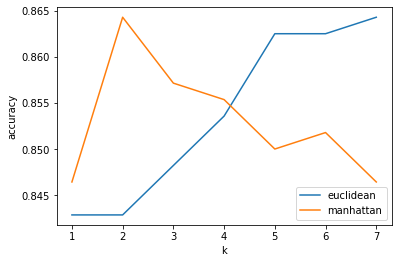

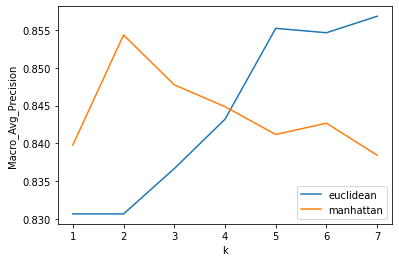

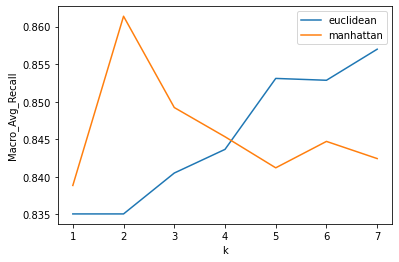

In [12]:
plt.plot(k, accuracy_euclidean, label = "euclidean")
plt.plot(k, accuracy_manhattan, label = "manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
plt.plot(k, macro_prec_euclidean, label = "euclidean")
plt.plot(k, macro_prec_manhattan, label = "manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('Macro_Avg_Precision')
plt.show()
plt.plot(k, macro_recall_euclidean, label = "euclidean")
plt.plot(k, macro_recall_manhattan, label = "manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('Macro_Avg_Recall')
plt.show()

# Part 2: k-NN classifier using scikit-learn 


### TASK 1:
In this part you have to use scikit-learn’s k-NN implementation to train and test your
classifier on the dataset used in Part 1. Run the k-NN classifier again for values of
k = 1, 2, 3, 4, 5, 6, 7 using both Euclidean and Manhattan distance. Use scikit-learn to calculate the accuracy, F1 score and confusion matrix for test data. Also present the
results as a graph with k values on x-axis and F1 score on y-axis for both distance metrics
in a single plot. 

In [13]:
### YOUR CODE HERE ###
k=[1,2,3,4,5,6,7]
distance_metric = ['Manhattan','Euclidean']
accuracy_euclidean = []
accuracy_manhattan = []
f1_euclidean = []
f1_manhattan = []
conf_matrix_euclidean = []
conf_matrix_manhattan = []
for i in k:
  ### Manhattan
  knn = KNeighborsClassifier(n_neighbors=i,p=1)
  knn.fit(train_images,train_labels)
  predictions = knn.predict(test_images)
  accuracy = accuracy_score(predictions,test_labels)
  accuracy_manhattan.append(accuracy)
  conf_matrix = confusion_matrix(predictions, test_labels)
  conf_matrix_manhattan.append(conf_matrix)
  f1 = f1_score(predictions,test_labels,average='macro')
  f1_manhattan.append(f1)
  print('\033[92m' +'\033[1m'+ '\033[4m'+ ' For Manhattan and k = ' + str(i) + '\033[0m')
  print('accuracy: ',accuracy)
  print('f1: ',f1)
  print('confusion_matrix: \n',conf_matrix)
    ###  Euclidean
  knn = KNeighborsClassifier(n_neighbors=i,p=2)
  knn.fit(train_images,train_labels)
  predictions = knn.predict(test_images)
  accuracy = accuracy_score(predictions,test_labels)
  accuracy_euclidean.append(accuracy)
  conf_matrix = confusion_matrix(predictions, test_labels)
  conf_matrix_euclidean.append(conf_matrix)
  f1 = f1_score(predictions,test_labels,average='macro')
  f1_euclidean.append(f1)
  print('\033[92m' +'\033[1m'+ '\033[4m'+ ' For Euclidean and k = ' + str(i) + '\033[0m')
  print('accuracy: ',accuracy)
  print('f1: ',f1)
  print('confusion_matrix: \n',conf_matrix)



 For Manhattan and k = 1
accuracy:  0.8464285714285714
f1:  0.8370405388734865
confusion_matrix: 
 [[ 70   8   4   9]
 [  4 155   2  11]
 [ 10  10 133  14]
 [  6   3   5 116]]
 For Euclidean and k = 1
accuracy:  0.8428571428571429
f1:  0.8318600510163978
confusion_matrix: 
 [[ 70   7   7  13]
 [  5 156   1  14]
 [ 10   5 130   7]
 [  5   8   6 116]]
 For Manhattan and k = 2
accuracy:  0.8589285714285714
f1:  0.8489502792491906
confusion_matrix: 
 [[ 78  13   8  14]
 [  3 159   1  13]
 [  8   3 134  13]
 [  1   1   1 110]]
 For Euclidean and k = 2
accuracy:  0.8428571428571429
f1:  0.8332781986262869
confusion_matrix: 
 [[ 80  15  11  21]
 [  3 157   3  15]
 [  5   3 128   7]
 [  2   1   2 107]]
 For Manhattan and k = 3
accuracy:  0.8535714285714285
f1:  0.8424264805874754
confusion_matrix: 
 [[ 72   7   8  14]
 [  4 157   1  12]
 [ 11   8 133   8]
 [  3   4   2 116]]
 For Euclidean and k = 3
accuracy:  0.85
f1:  0.8379162791457638
confusion_matrix: 
 [[ 72  10   7  15]
 [  3 160   2  1

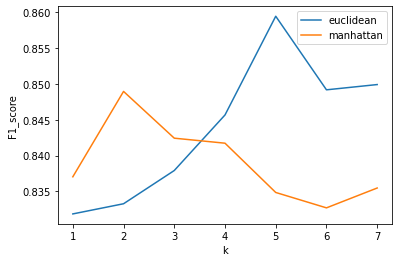

In [14]:
plt.plot(k, f1_euclidean, label = "euclidean")
plt.plot(k, f1_manhattan, label = "manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1_score')
plt.show()

### TASK 2:
For this task you have been given a synthetic dataset of 1000 samples which is divided into 6 classes. Visualization of this dataset has also been given. Now you need to find the optimum value of k for this dataset. This can be done using GridSearchCV function provided by Scikit-learn. This function allows us to check easily for multiple values of k. You need to check for the values of k between 1 and 20 and report the best value of k.

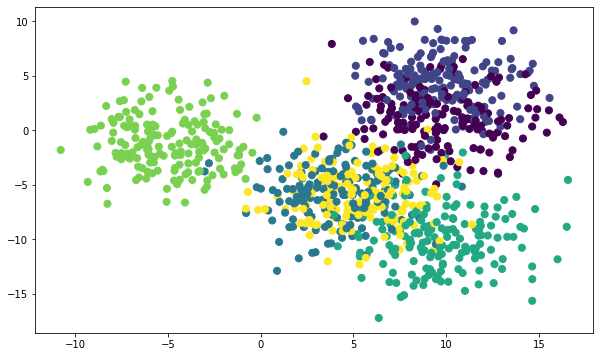

In [15]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 6, cluster_std = 2.5, random_state = 4)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, marker= 'o', s=50)
plt.show()

In [16]:
### YOUR CODE HERE ###
k_range = [i for i in range(1,21)]
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',verbose=1)
grid_ = grid.fit(X, y)
print(grid.cv_results_['mean_test_score'])
print('\033[92m' +'\033[1m'+ '\033[4m'+ 'BEST K: ', grid_.best_params_['n_neighbors'])


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[0.669 0.668 0.702 0.696 0.685 0.694 0.695 0.694 0.69  0.715 0.704 0.705
 0.706 0.715 0.707 0.704 0.703 0.707 0.709 0.71 ]
BEST K:  10


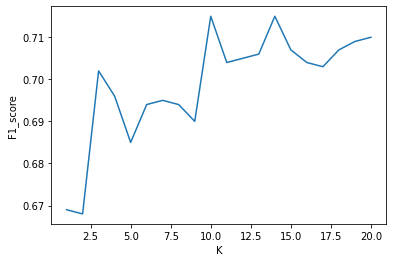

OPtimal K : 10


In [17]:
plt.plot(k_range,grid.cv_results_['mean_test_score'])
#plt.axis([0.5, len(k_range)+0.5, 0.66, 0.73])
plt.xlabel('K')
plt.ylabel('F1_score')
plt.show()
print('OPtimal K : 10')

#### ***Question: Is Feature Scaling required for the KNN Algorithm? Explain with proper justification.***

Ans: It is important that all features contribute equally to KNN classification. However, if some feature value dominate, this will make the algortihm less accurate. Thus, it is important that the normalisation is done to make sure all feature values contribute equally